# Regression in Python

***

In [1]:
# Numerical arrays
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

In [2]:
# Plots styles.
plt.style.use('ggplot')

# Plot size.
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
# Create two points.
x = np.array([4.0, 16.0])
y = np.array([6.0, 12.0])
x, y

(array([ 4., 16.]), array([ 6., 12.]))

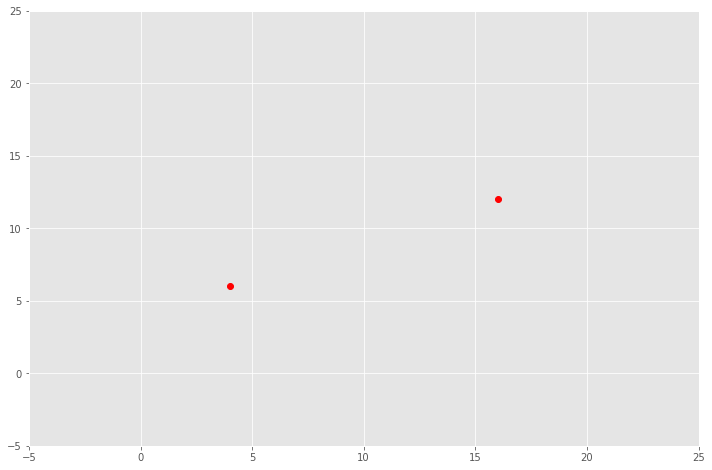

In [4]:
# Plot the points.
plt.plot(x, y, 'ro')

# Give ourselves some space.
plt.xlim([-5.0, 25.0])
plt.ylim([-5.0, 25.0]);

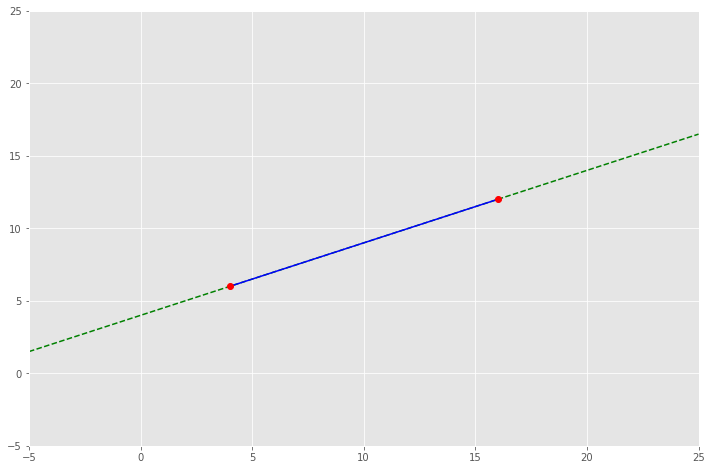

In [5]:
# Plot a straight line.
l = np.linspace(-5.0, 25.0, 100)
plt.plot(l, 0.5 * l + 4.0, 'g--')

# Plot a straight line segment.
l = np.linspace(4.0, 16.0, 10)
plt.plot(l, 0.5 * l + 4.0, 'b-')

# Plot the points.
plt.plot(x, y, 'ro')

# Give ourselves some space.
plt.xlim([-5.0, 25.0])
plt.ylim([-5.0, 25.0]);

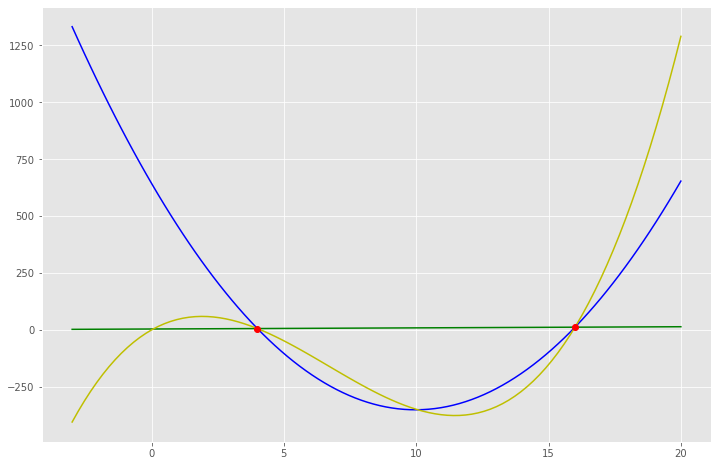

In [6]:
# Plot a straight line.
l = np.linspace(-3.0, 20.0, 100)
plt.plot(l, 0.5 * l + 4.0, 'g-')

# Plot a parabola.
plt.plot(l, 10.0 * (l**2) - 199.5 * l + 644.0, 'b-')

# Plot a cubic.
plt.plot(l, (l**3)  - 20.0625 * l**2  + 65.75 * l, 'y-')

# Plot the points.
plt.plot(x, y, 'ro');

<br>

#### Lines

***

In [7]:
# Set up some x values.
x = np.linspace(0.0, 10.0, 1000)
x

array([ 0.        ,  0.01001001,  0.02002002,  0.03003003,  0.04004004,
        0.05005005,  0.06006006,  0.07007007,  0.08008008,  0.09009009,
        0.1001001 ,  0.11011011,  0.12012012,  0.13013013,  0.14014014,
        0.15015015,  0.16016016,  0.17017017,  0.18018018,  0.19019019,
        0.2002002 ,  0.21021021,  0.22022022,  0.23023023,  0.24024024,
        0.25025025,  0.26026026,  0.27027027,  0.28028028,  0.29029029,
        0.3003003 ,  0.31031031,  0.32032032,  0.33033033,  0.34034034,
        0.35035035,  0.36036036,  0.37037037,  0.38038038,  0.39039039,
        0.4004004 ,  0.41041041,  0.42042042,  0.43043043,  0.44044044,
        0.45045045,  0.46046046,  0.47047047,  0.48048048,  0.49049049,
        0.5005005 ,  0.51051051,  0.52052052,  0.53053053,  0.54054054,
        0.55055055,  0.56056056,  0.57057057,  0.58058058,  0.59059059,
        0.6006006 ,  0.61061061,  0.62062062,  0.63063063,  0.64064064,
        0.65065065,  0.66066066,  0.67067067,  0.68068068,  0.69

***

$$ y = 5 x + 2 $$

In [8]:
# Create y - note numpy's element-wise operations.
y = 5.0 * x + 2.0

In [9]:
# Look at y.
y

array([ 2.        ,  2.05005005,  2.1001001 ,  2.15015015,  2.2002002 ,
        2.25025025,  2.3003003 ,  2.35035035,  2.4004004 ,  2.45045045,
        2.5005005 ,  2.55055055,  2.6006006 ,  2.65065065,  2.7007007 ,
        2.75075075,  2.8008008 ,  2.85085085,  2.9009009 ,  2.95095095,
        3.001001  ,  3.05105105,  3.1011011 ,  3.15115115,  3.2012012 ,
        3.25125125,  3.3013013 ,  3.35135135,  3.4014014 ,  3.45145145,
        3.5015015 ,  3.55155155,  3.6016016 ,  3.65165165,  3.7017017 ,
        3.75175175,  3.8018018 ,  3.85185185,  3.9019019 ,  3.95195195,
        4.002002  ,  4.05205205,  4.1021021 ,  4.15215215,  4.2022022 ,
        4.25225225,  4.3023023 ,  4.35235235,  4.4024024 ,  4.45245245,
        4.5025025 ,  4.55255255,  4.6026026 ,  4.65265265,  4.7027027 ,
        4.75275275,  4.8028028 ,  4.85285285,  4.9029029 ,  4.95295295,
        5.003003  ,  5.05305305,  5.1031031 ,  5.15315315,  5.2032032 ,
        5.25325325,  5.3033033 ,  5.35335335,  5.4034034 ,  5.45

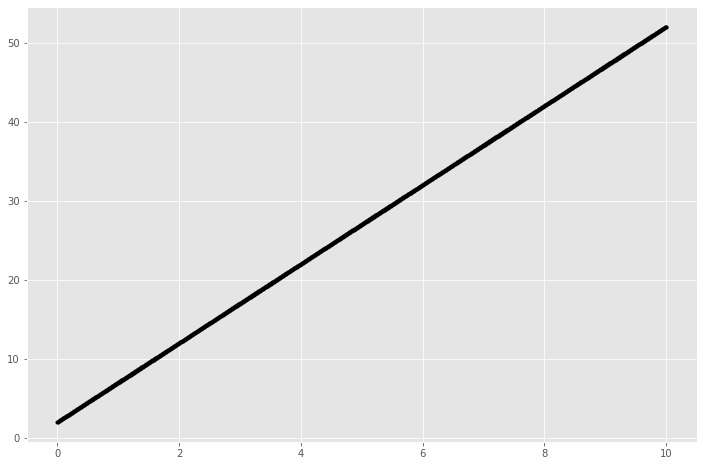

In [10]:
# Plot x versus y.
plt.plot(x, y, 'k.')

In [11]:
# Do regression on the x and y arrays using numpy.
np.polyfit(x, y, 1)

array([5., 2.])

***

$$ y = 3 x - 1 + \epsilon $$

In [12]:
# Create a y with noise.
y = 3.0 * x - 1.0 + np.random.normal(0.0, 1.0, len(x))

In [13]:
# Look at y.
y

array([-1.80243008e+00,  4.65032561e-01, -1.04536179e+00, -3.83957536e-01,
       -1.43800669e+00, -2.82581286e+00, -1.23403356e+00, -3.27647837e-01,
       -2.41505154e+00, -1.02597216e+00, -4.80400105e-01, -1.72770264e+00,
        3.48693899e-01,  2.42385683e-01, -3.58794203e-01, -3.38358508e-01,
       -2.25615807e+00,  4.67828105e-01, -1.82599992e+00,  1.02836593e+00,
       -4.47957911e-01, -1.35349411e+00,  1.22072835e-01, -8.92757468e-02,
       -1.79594834e+00, -7.39470118e-01,  1.10338734e+00,  3.36417972e-01,
       -1.27642001e-02,  1.90609082e+00,  1.83254074e+00,  4.53296747e-02,
       -1.47347249e+00,  4.60243029e-01, -2.58764039e-01,  7.05028377e-01,
       -9.14812046e-01, -2.21140535e-01, -9.81144942e-01, -2.96664277e+00,
       -1.01576913e-01, -1.03678696e+00,  1.32714281e+00,  7.82415060e-01,
       -9.02187331e-01,  1.30082104e+00, -1.14899186e+00,  3.75463123e-01,
        1.36017935e+00, -1.36392803e-01,  7.19732590e-01,  1.60584938e+00,
       -7.58713024e-01, -

In [14]:
# Do regression on the x and y arrays using numpy.
np.polyfit(x, y, 1)

array([ 3.01209078, -1.06067635])

In [15]:
# Create variables with those values.
m, c = np.polyfit(x, y, 1)
# Have a look at m and c.
m, c

(3.0120907776499664, -1.060676350019941)

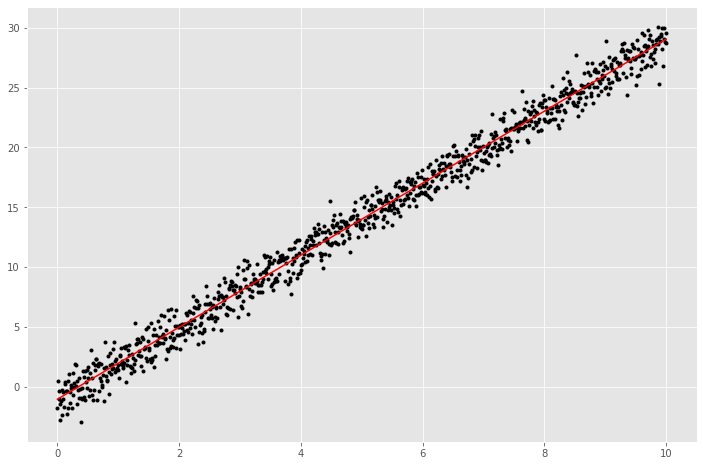

In [16]:
# Plot x and y and the regression line in red.
plt.plot(x, y, 'k.')
plt.plot(x, m * x + c, 'r-')

Note that we can easily calculate the best m and c ourselves.

In [17]:
# Calculate mean x and mean y.
x_avg = np.mean(x)
y_avg = np.mean(y)

# Subtract means from x and y.
x_zero = x - x_avg
y_zero = y - y_avg

# Dot product of mean-adjusted x and y divided by dot product of mean adjusted x with itself.
m = np.sum(x_zero * y_zero) / np.sum(x_zero * x_zero)
# Subtract m times average x from average y.
c = y_avg - m * x_avg

# Let's have a look - same values as above.
m, c

(3.0120907776499637, -1.0606763500199374)

***

$$ y = 2 x^2 + 5x + 1 + \epsilon $$

In [18]:
# Create y from a polynomial in x.
y =  2.0 * x * x + 5.0 * x + 1.0 + np.random.normal(0.0, 1.0, len(x))

In [19]:
# Look at y.
y

array([1.85539905e+00, 1.46158550e+00, 1.05484267e+00, 1.65755501e+00,
       1.04129132e+00, 1.01738921e-01, 2.09238991e+00, 2.20103767e+00,
       5.42429101e-01, 3.90055080e+00, 1.27835309e+00, 9.38275968e-01,
       2.33649514e+00, 2.52332352e+00, 3.49606562e+00, 2.05259511e+00,
       2.07280213e+00, 2.96161957e+00, 6.84454247e-01, 2.22682499e+00,
       1.79353984e+00, 2.77178656e+00, 1.40422367e+00, 1.67456205e+00,
       1.88905361e+00, 8.66820546e-02, 1.23215152e+00, 1.58169272e-01,
       3.20156341e+00, 1.25681971e+00, 1.86241183e+00, 2.52078411e+00,
       1.82799904e+00, 3.01592052e+00, 3.48643922e+00, 3.45337491e+00,
       6.03264985e+00, 3.18339995e+00, 2.82105467e+00, 2.00695620e+00,
       2.44009842e+00, 2.33557272e+00, 2.73990875e+00, 3.08485726e+00,
       3.23347874e+00, 3.78366946e+00, 3.12338587e+00, 4.31737409e+00,
       3.45581310e+00, 3.21866371e+00, 5.22591493e+00, 4.29986671e+00,
       4.29728694e+00, 3.33132656e+00, 4.69477228e+00, 3.98204251e+00,
      

In [20]:
# Blindly try the regression - we get answers.
# Create variables with those values.
m, c = np.polyfit(x, y, 1)
# Have a look at m and c.
m, c

(25.00301522766029, -32.29058148957602)

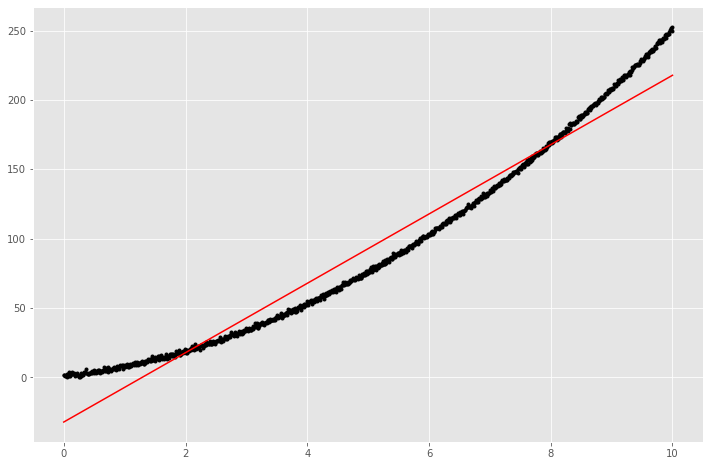

In [21]:
# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, m * x + c, 'r-')

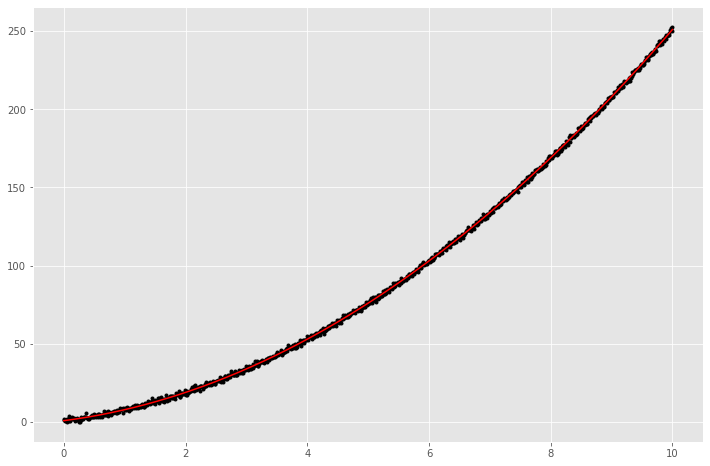

In [22]:
# Create variables with those values.
a, b, c = np.polyfit(x, y, 2)

# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x + b * x + c, 'r-')

Note how the points below the line are bunched in a specific $x$ range.

***

## Multiple linear regression

Let's try multiple linear regression using sklearn.
[https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)

In [23]:
# Import linear_model from sklearn.
import sklearn.linear_model as lm

In [24]:
# Create a linear regression model instance.
m = lm.LinearRegression()

In [25]:
# Let's use pandas to read a csv file and organise our data.
import pandas as pd

In [26]:
# Read the iris csv from online.
df = pd.read_csv('https://datahub.io/machine-learning/iris/r/iris.csv')

In [27]:
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


$$ petalwidth = t (sepallength) + u (sepalwidth) + v (petallength) + c $$

In [28]:
# Let's pretend we want to do linear regression on these variables to predict petal width.
x = df[['sepallength', 'sepalwidth', 'petallength']]

In [29]:
# Here's petal width.
y = df['petalwidth']

In [30]:
# Ask our model to fit the data.
m.fit(x, y)

LinearRegression()

In [31]:
# Here's our intercept.
m.intercept_

-0.248723586024453

In [32]:
# Here's our coefficients, in order.
m.coef_

array([-0.21027133,  0.22877721,  0.52608818])

In [33]:
# See how good our fit is.
m.score(x, y)

0.9380481344518986

In [34]:
# Calculating the score by hand.
t, u, v = m.coef_
c = m.intercept_

y_avg = y.mean()

u = ((y - (t * x['sepallength'] + u * x['sepalwidth'] + v * x['petallength'] + c))**2).sum()
v = ((y - y.mean())**2).sum()

1 - (u/v)

0.9380481344518986

***

## Using statsmodels

In [35]:
# Using statsmodels.
import statsmodels.api as sm

# Tell statmodels to include an intercept.
xwithc = sm.add_constant(x)

# Create a model.
msm = sm.OLS(y, xwithc)
# Fit the data.
rsm = msm.fit()
# Print a summary.
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:             petalwidth   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     736.9
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           6.20e-88
Time:                        16:44:34   Log-Likelihood:                 36.809
No. Observations:                 150   AIC:                            -65.62
Df Residuals:                     146   BIC:                            -53.57
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2487      0.178     -1.396      

## End